This is the walkthrough of the book [Little Learner](https://www.amazon.com/Little-Learner-Straight-Line-Learning-ebook/dp/B0BCDKRPTJ).


In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
%matplotlib inline

`l2_loss` calculates the loss of target given xs and corresponding ys.
`line` represents, well, a line mx + b.

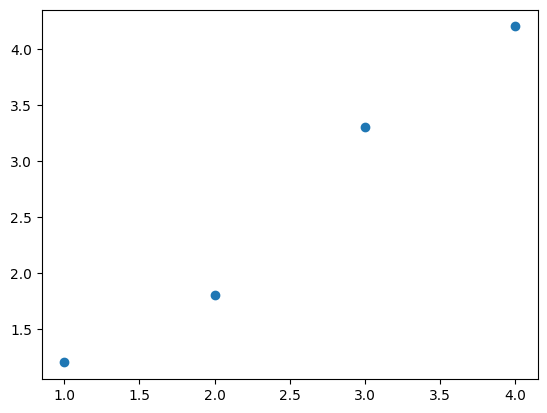

In [3]:
line_xs = np.array([2.0, 1.0, 4.0, 3.0])
line_ys =np.array([1.8, 1.2, 4.2, 3.3])
plt.scatter(line_xs, line_ys);

In [4]:
def l2_loss(target, xs: np.ndarray, ys: np.ndarray):
    def calculate_loss(params: np.ndarray) -> float:
        actual_ys = target(xs, params)
        return np.sum((actual_ys - ys) ** 2)

    return calculate_loss

def line(xs, params: np.ndarray):
    m, b = params
    return m * xs + b


l2_loss(line, xs=line_xs, ys=line_ys)(np.array([0, 0]))

33.21

We have a loss 33.21. That's pretty substantial. Let's improve that.

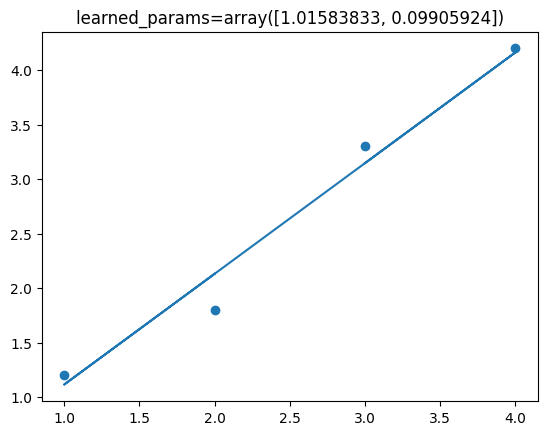

In [5]:
def learn(target, learning_rates, xs, ys, delta=0.001, num_iterations=100):
    # initial params
    params = np.array([0.0, 0.0])
    for i in range(num_iterations):
        loss = l2_loss(target, xs, ys)(params)
        change = np.array([0.0, 0.0])
        # we calculate partial derivatives and update each param
        # using learning_rate
        for j, value in enumerate(params):
            learning_params = params.copy()
            learning_params[j] += delta
            next_loss = l2_loss(target, xs, ys)(learning_params)
            # loss_rate is a gradient
            # we slide the gradient at each point to find the
            # better-fitted params
            loss_rate = (next_loss - loss) / delta
            change[j] -= loss_rate * learning_rates[j]
        params += change
    return params

learned_params = learn(line, learning_rates=np.array([0.01, 0.01]), xs=line_xs, ys=line_ys)

plt.scatter(line_xs, line_ys)
plt.plot(line_xs, line(line_xs, learned_params))
plt.title(f'{learned_params=}')
plt.show()

Now the line is well-fitted.